## just like panda is build on numpy , seaborn is built on matplotlib

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
import seaborn as sns


In [4]:
df_DA_US=df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

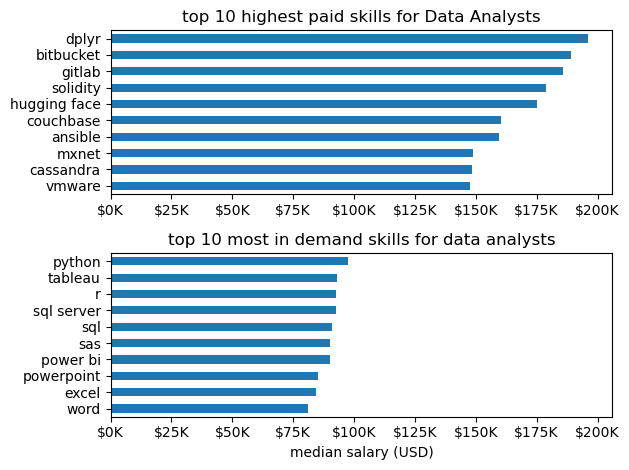

In [5]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)


df_DA_skills=df_DA_US_group.sort_values(by='count',ascending=False).head(10)
df_DA_skills=df_DA_skills.sort_values(by='median',ascending=False)

fig,ax=plt.subplots(2,1)
df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend=False)
# ax[0].invert_yaxis()
ax[0].set_title('top 10 highest paid skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))


df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('top 10 most in demand skills for data analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

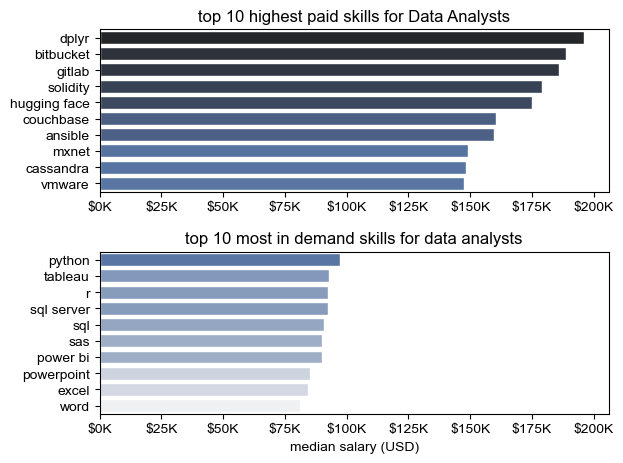

In [11]:
fig,ax=plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
  # _r to reverse the order ofcolor
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend=False)
# ax[0].invert_yaxis()
ax[0].set_title('top 10 highest paid skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))



sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1],hue='median', palette='light:b' )
ax[1].legend().remove()

# df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('top 10 most in demand skills for data analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

In [12]:
## histogram

Text(12.444444444444445, 0.5, 'number of jobs')

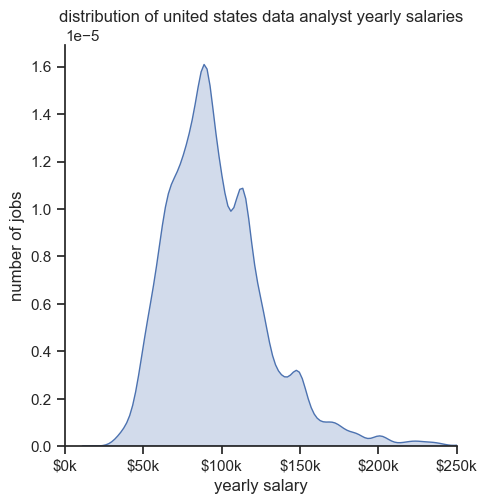

In [15]:
sns.displot(df_DA_US['salary_year_avg'],kind='kde', fill=True)

# df_DA_US['salary_year_avg'].plot(kind='hist', bins=40,edgecolor='black')
plt.xlim(0,250000)
# formating y axis
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}k'))
plt.title('distribution of united states data analyst yearly salaries')
plt.xlabel('yearly salary')
plt.ylabel('number of jobs')

In [16]:
# box plot

C:\Users\Aadarsh Singh\AppData\Local\Temp\ipykernel_35024\2348035377.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles,vert=False)


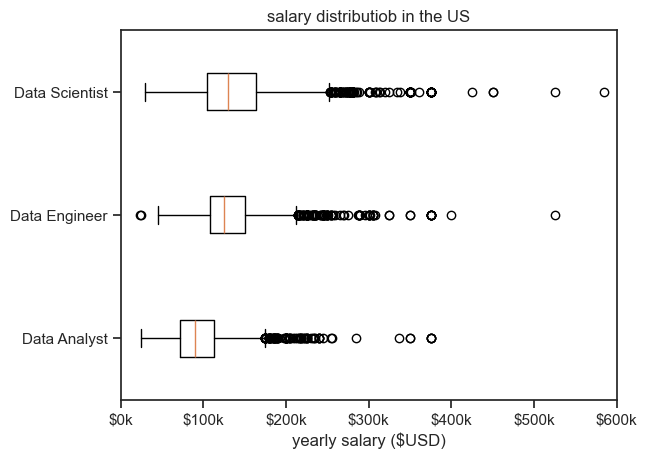

In [ ]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()


df_US=df_US.dropna(subset=['salary_year_avg'])


job_list=[df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles,vert=False)

plt.title('salary distributiob in the US')
plt.xlabel('yearly salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k' ))

# for filtering 0 to 600k
plt.xlim(0,600000)
plt.show()

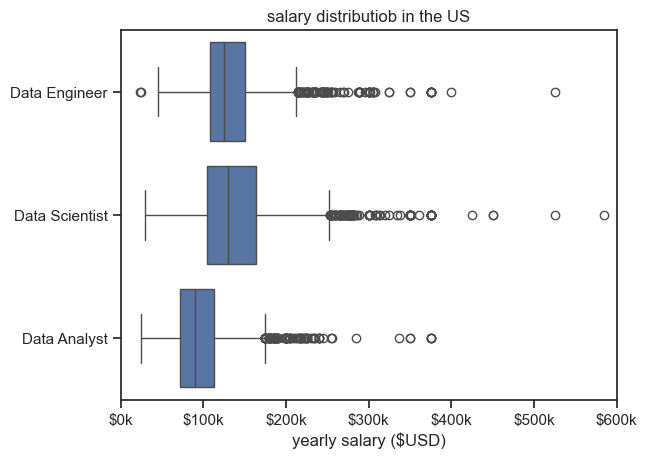

In [21]:
sns.boxplot(data=df_US, x='salary_year_avg',y='job_title_short')

plt.title('salary distributiob in the US')
plt.xlabel('yearly salary ($USD)')
plt.ylabel('')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k' ))

# for filtering 0 to 600k
plt.xlim(0,600000)
plt.show()